# Tutorial on getting hands on the event data for a single match.
-----


*author: aliha*

*twitter: @rockingAli5* 

New: Now added xG data for shots from Understat.com(only available for top 5 european leagues since 2014-15).

# Import modules

In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
import main
import visuals
import seaborn as sns
import sys
sys.path.append("../../../Football Data Analysis/LaurieOnTracking-master")
import Metrica_EPV as mepv

# Get match data

In [3]:
if __name__ == "__main__":
    driver = webdriver.Chrome('chromedriver.exe')
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://www.whoscored.com/Matches/1491995/Live/Spain-LaLiga-2020-2021-Barcelona-Sevilla"
match_data = main.getMatchData(driver, url, close_window=False)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# Add xG data to events dataframe
events_df = main.getxGFromUnderstat(match_data, events_df, driver)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Spain, League: LaLiga, Season: 2013/2014, Match Id: 738833
Expected Goals data for season not available


# Calculate EPV for successful passes

In [5]:
EPV = mepv.load_EPV_grid('../../../Football Data Analysis/LaurieOnTracking-master/EPV_grid.csv')
events_df = main.to_metric_coordinates_from_whoscored(events_df)
events_df = main.addEpvToDataFrame(events_df,EPV)

# Get pass data for a team

## All passes 

In [6]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Get Player Names
team_players_dict = {}
for player in matches_df[venue][match_data['matchId']]['players']:
    team_players_dict[player['playerId']] = player['name'] 
    
# Total Passes
passes_df = events_df.loc[[row['displayName'] == 'Pass' for row in list(events_df['type'])]].reset_index(drop=True)
passes_df = passes_df.loc[[row['displayName'] == 'Successful' for row in list(passes_df['outcomeType'])]].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['teamId'] == teamId].reset_index(drop=True)
passes_df.insert(27, column='playerName', value=[team_players_dict[i] for i in list(passes_df['playerId'])])

passes_df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,blockedY,isGoal,cardType,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
0,2.219390e+09,3,0,0.0,65,50.0,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,0.000,-11.024,0.000,-1.700,0.0133,0.0118,-0.0015
1,2.219390e+09,4,0,1.0,65,39.6,47.5,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-11.024,-10.070,-1.700,8.432,0.0118,0.0125,0.0007
2,2.219390e+09,5,0,3.0,65,40.5,62.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-10.070,-21.730,8.432,9.860,0.0125,0.0098,-0.0027
3,2.219390e+09,6,0,6.0,65,29.1,64.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-22.154,-26.076,9.792,-6.392,0.0098,0.0093,-0.0005
4,2.219390e+09,7,0,7.0,65,25.0,40.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-26.500,-44.944,-6.800,-3.944,0.0093,0.0075,-0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,2.219448e+09,972,94,42.0,65,46.4,89.0,95,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-3.816,-12.720,26.520,13.260,0.0118,0.0109,-0.0009
590,2.219448e+09,973,94,45.0,65,32.6,68.6,95,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-18.444,-35.828,12.648,-3.264,0.0103,0.0082,-0.0021
591,2.219448e+09,974,94,49.0,65,17.4,44.5,95,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-34.556,-27.878,-3.740,-15.164,0.0082,0.0082,0.0000
592,2.219448e+09,977,94,57.0,65,52.2,0.0,95,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,2.332,1.484,-34.000,-22.236,0.0127,0.0131,0.0004


## Passes cut into different durations

In [7]:
# Cut in 2
first_half_passes = passes_df.loc[[row['displayName'] == 'FirstHalf' for row in list(passes_df['period'])]]
second_half_passes = passes_df.loc[[row['displayName'] == 'SecondHalf' for row in list(passes_df['period'])]].reset_index(drop=True)

# Cut in 4 (quarter = 25 mins)
first_quarter_passes = first_half_passes.loc[first_half_passes['minute'] <= 25]
second_quarter_passes = first_half_passes.loc[first_half_passes['minute'] > 25].reset_index(drop=True)
third_quarter_passes = second_half_passes.loc[second_half_passes['minute'] <= 70]
fourth_quarter_passes = second_half_passes.loc[second_half_passes['minute'] > 70].reset_index(drop=True)

first_quarter_passes

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,blockedY,isGoal,cardType,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
0,2.219390e+09,3,0,0.0,65,50.0,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,0.000,-11.024,0.000,-1.700,0.0133,0.0118,-0.0015
1,2.219390e+09,4,0,1.0,65,39.6,47.5,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-11.024,-10.070,-1.700,8.432,0.0118,0.0125,0.0007
2,2.219390e+09,5,0,3.0,65,40.5,62.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-10.070,-21.730,8.432,9.860,0.0125,0.0098,-0.0027
3,2.219390e+09,6,0,6.0,65,29.1,64.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-22.154,-26.076,9.792,-6.392,0.0098,0.0093,-0.0005
4,2.219390e+09,7,0,7.0,65,25.0,40.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-26.500,-44.944,-6.800,-3.944,0.0093,0.0075,-0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2.219407e+09,228,25,38.0,65,74.5,63.0,25,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,25.970,24.592,8.840,-1.836,0.0335,0.0315,-0.0020
127,2.219407e+09,229,25,41.0,65,73.2,39.7,25,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,24.592,28.620,-7.004,-19.992,0.0306,0.0285,-0.0021
128,2.219407e+09,230,25,43.0,65,77.2,20.8,25,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,28.832,27.242,-19.856,-17.952,0.0285,0.0273,-0.0012
129,2.219407e+09,231,25,46.0,65,75.7,23.6,25,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,27.242,35.934,-17.952,-22.236,0.0273,0.0323,0.0050


# Get pass visualisations

## All passes

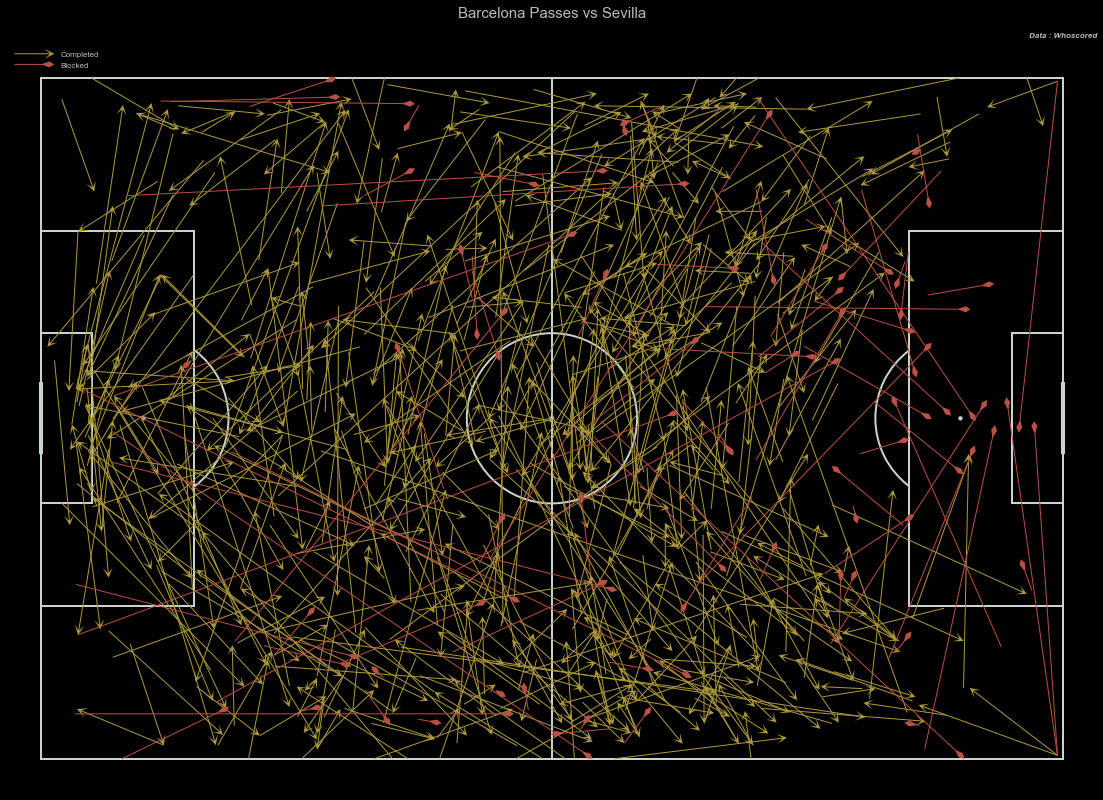

In [8]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

visuals.getTeamTotalPasses(events_df, teamId, team, opponent, pitch_color='#000000')

## Successful box passes

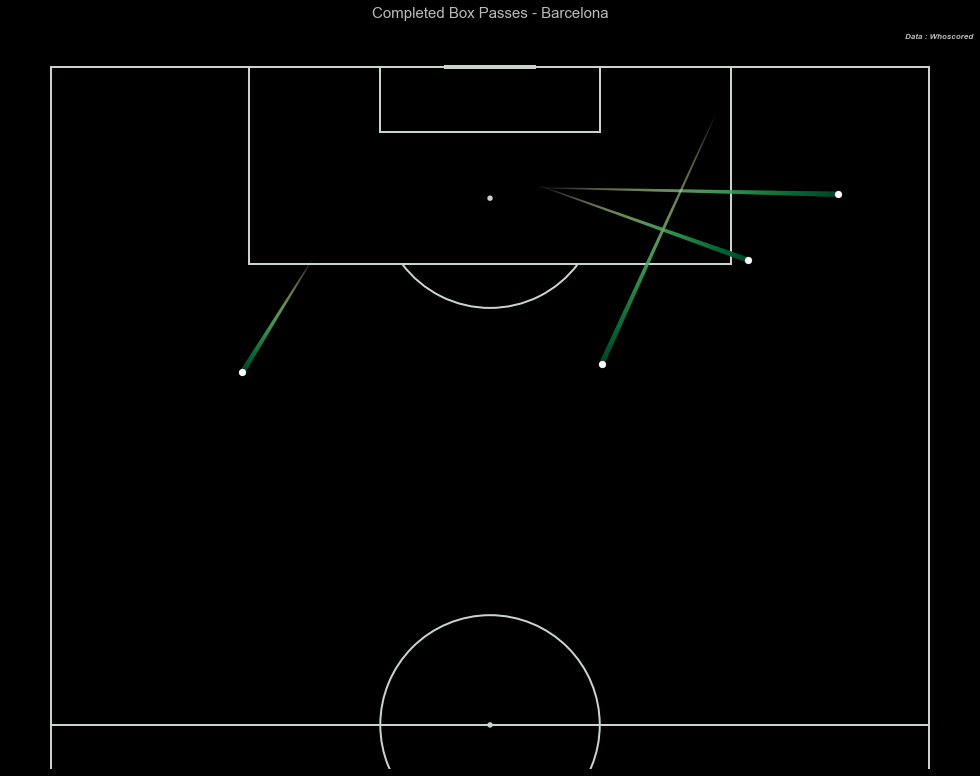

In [9]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

#You can select more cmaps here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
visuals.getTeamSuccessfulBoxPasses(events_df, teamId, team, pitch_color='#000000', cmap='YlGn')

## All passes network

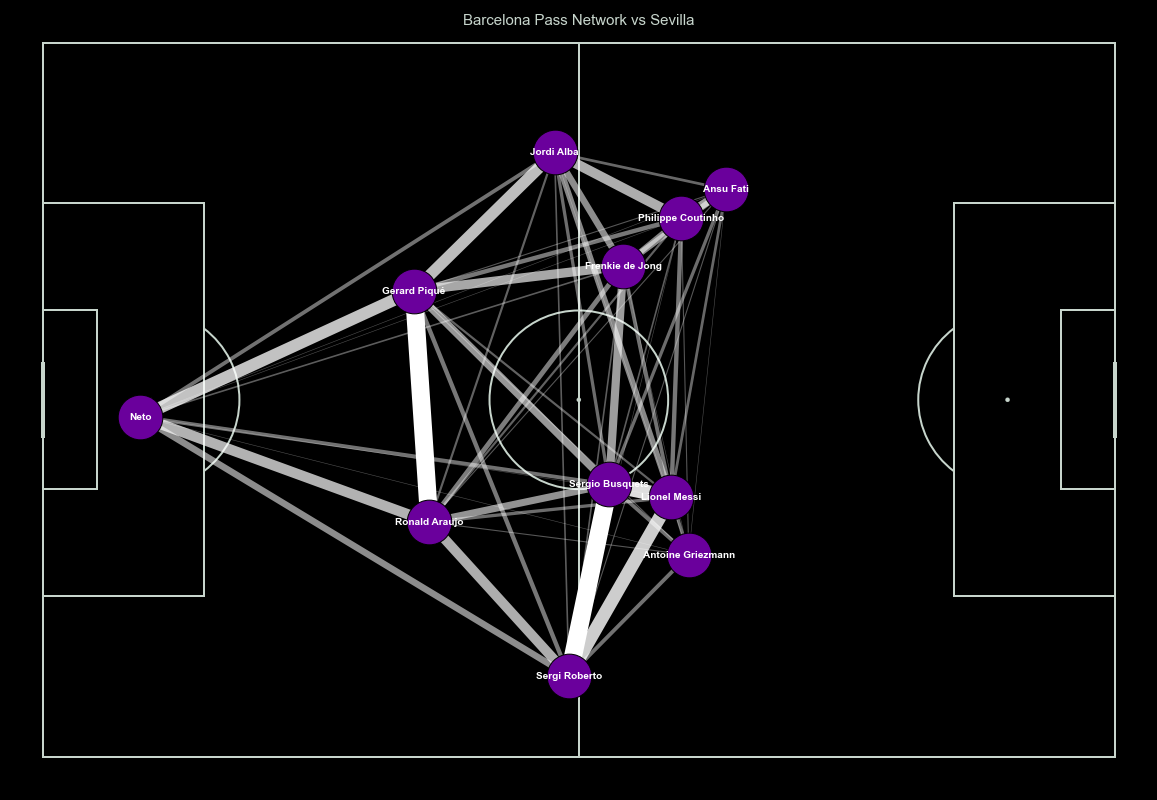

In [4]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Create Pass Network     
visuals.createPassNetworks(match_data, matches_df, events_df, team='Barcelona',
                           pitch_color='#000000', max_lw=18, marker_size=2000, 
                           marker_color='#6a009c', marker_label='name', marker_label_size=10)

## Progressive passes network

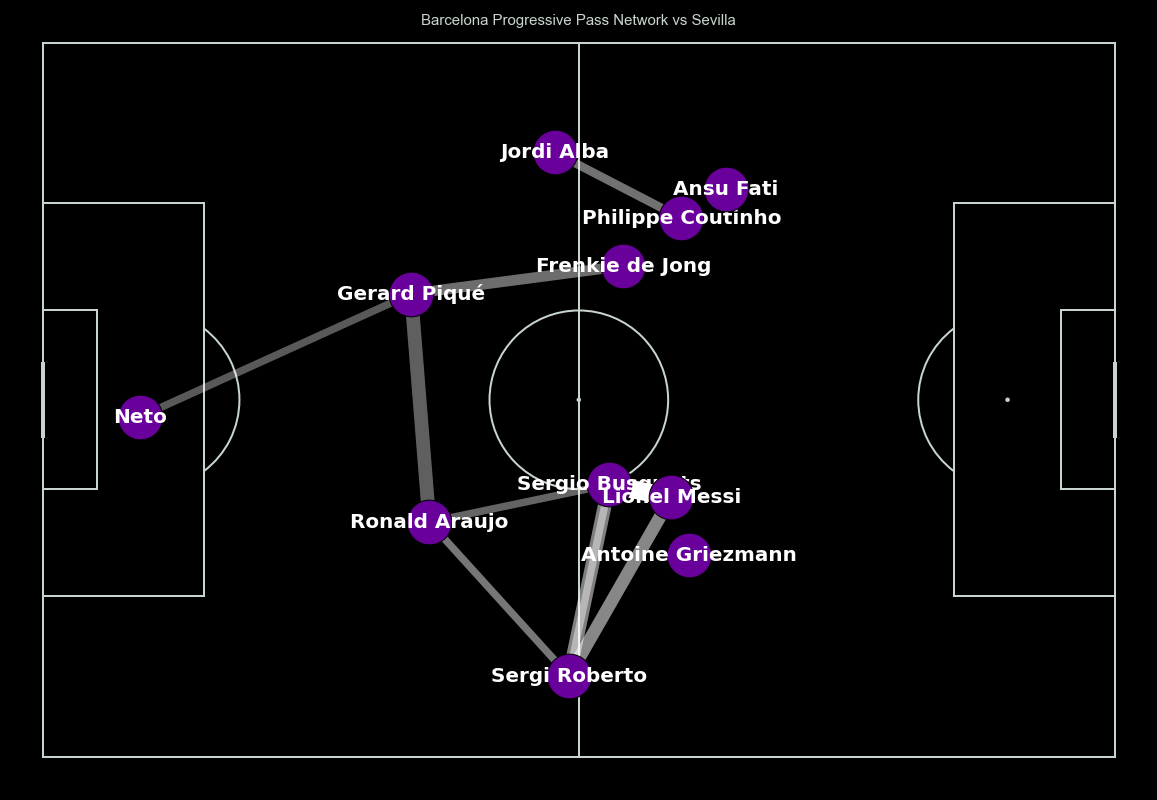

In [5]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Create Progressive Pass Network
visuals.createAttPassNetworks(match_data, matches_df, events_df, team='Barcelona', 
                              pitch_color='#000000', max_lw=18, marker_size=2000, 
                              marker_color='#6a009c', marker_label='name')

# Get shotmap

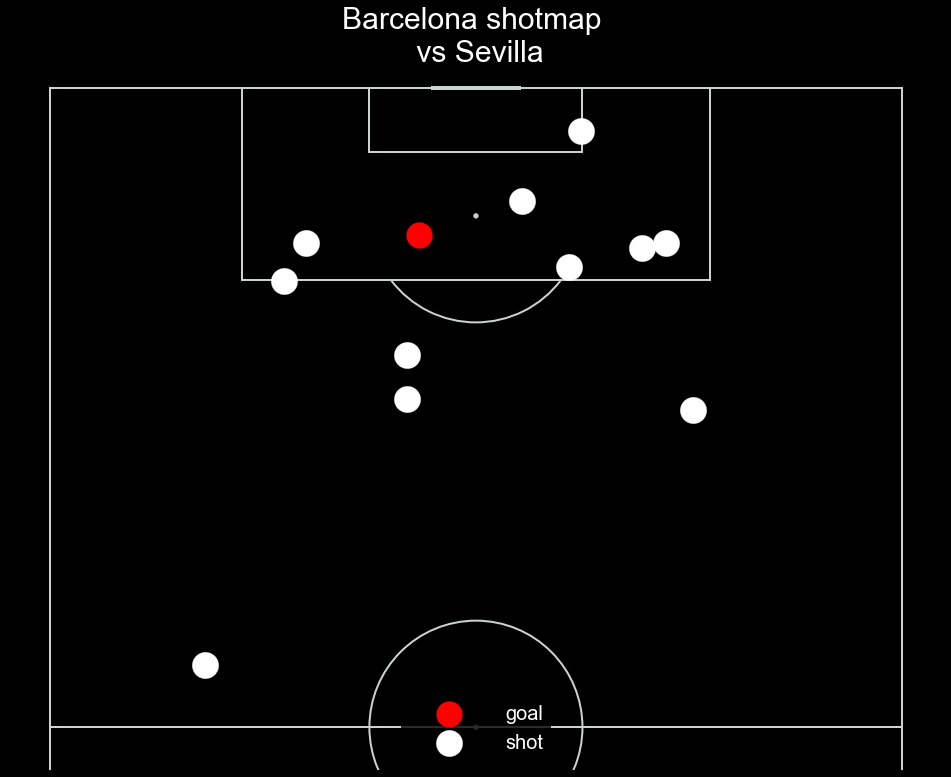

In [16]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

visuals.createShotmap(match_data, events_df, team=team, pitchcolor='black', shotcolor='white',
                      goalcolor='red', titlecolor='white', legendcolor='white', marker_size=700)

# Get PV formation map

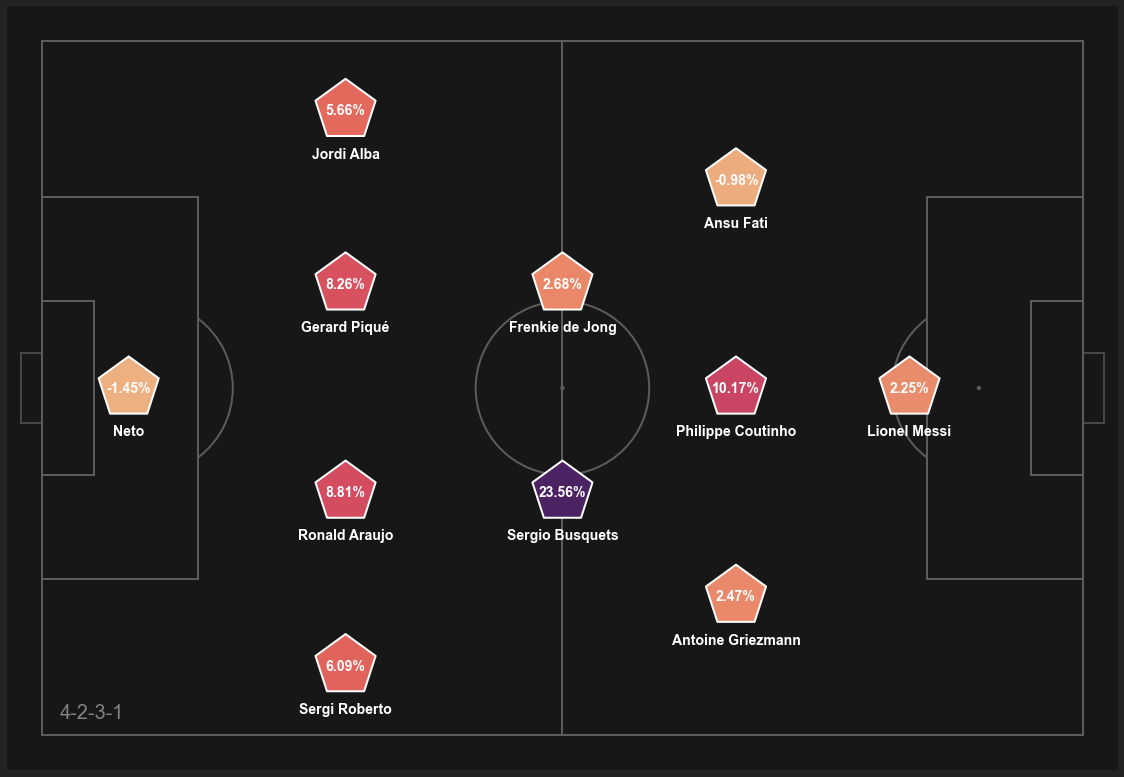

In [14]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Choose your color palette from here: https://seaborn.pydata.org/tutorial/color_palettes.html
visuals.createPVFormationMap(match_data, events_df, team=team, color_palette=sns.color_palette("flare", as_cmap=True),
                             markerstyle='p', markersize=4000, markeredgewidth=2, labelsize=14, labelcolor='w')